# O script prevê se o aluno vai ser aprovado ou não

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import numpy as np

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Fonte da base de dados:
* Se trata de infromações sobre a vida dos estudantes da discplina de português, e as suas notas
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [2]:
df = pd.read_csv('student-por.csv', sep = ';')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Eu resolvi tirar as notas g1 e g2, pois o objetivo é prever o resultado da g3
* g1 / g2 / g3 = notas do período, sendo g3 a última

In [4]:
df.drop(columns='G1', inplace=True)
df.drop(columns='G2', inplace=True)
df.drop(columns='school', inplace=True)

In [5]:
df.shape

(649, 30)

In [6]:
0.70 * 20

14.0

In [7]:
df.iloc[:, 0:30]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,4,11
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,2,11
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,6,12
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,0,14
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,yes,no,5,4,2,1,2,5,4,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,yes,no,4,3,4,1,1,1,4,16
646,F,18,U,GT3,T,1,1,other,other,course,...,no,no,1,1,1,1,1,5,6,9
647,M,17,U,LE3,T,3,1,services,services,course,...,yes,no,2,4,5,3,4,2,6,10


### Se a nota do aluno fosse supeior ou igual a 70% da nota máxima que é 20, ele estaria aprovado

In [8]:
lista_desempenho = list()

for dados in range(0, len(df['G3'])):
    if df['G3'][dados] >= (0.70*20):
        lista_desempenho.append('APROVADO')
    else:
        lista_desempenho.append('REPROVADO')

In [9]:
df.drop(columns='G3', inplace=True)

In [10]:
df.insert(loc = 29, column='G3', value=lista_desempenho)

In [11]:
df.iloc[:, 0:29]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,U,GT3,T,3,3,other,other,home,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,yes,yes,no,5,4,2,1,2,5,4
645,F,18,U,LE3,T,3,1,teacher,services,course,...,yes,yes,no,4,3,4,1,1,1,4
646,F,18,U,GT3,T,1,1,other,other,course,...,yes,no,no,1,1,1,1,1,5,6
647,M,17,U,LE3,T,3,1,services,services,course,...,yes,yes,no,2,4,5,3,4,2,6


In [12]:
previsores = df.iloc[:, 0:29].values

In [13]:
classe = df.iloc[:, 29].values

In [14]:
classe[0:10]

array(['REPROVADO', 'REPROVADO', 'REPROVADO', 'APROVADO', 'REPROVADO',
       'REPROVADO', 'REPROVADO', 'REPROVADO', 'APROVADO', 'REPROVADO'],
      dtype=object)

In [15]:
label_encoder = LabelEncoder()

### Tranformando as variáveis não númericas em númericas

In [16]:
previsores[:, 0] = label_encoder.fit_transform(previsores[:, 0])
previsores[:, 2] = label_encoder.fit_transform(previsores[:, 2])
previsores[:, 3] = label_encoder.fit_transform(previsores[:, 3])
previsores[:, 4] = label_encoder.fit_transform(previsores[:, 4])
previsores[:, 7] = label_encoder.fit_transform(previsores[:, 7])
previsores[:, 8] = label_encoder.fit_transform(previsores[:, 8])
previsores[:, 9] = label_encoder.fit_transform(previsores[:, 9])
previsores[:, 10] = label_encoder.fit_transform(previsores[:, 10])
previsores[:, 14] = label_encoder.fit_transform(previsores[:, 14])
previsores[:, 15] = label_encoder.fit_transform(previsores[:, 15])
previsores[:, 16] = label_encoder.fit_transform(previsores[:, 16])
previsores[:, 17] = label_encoder.fit_transform(previsores[:, 17])
previsores[:, 18] = label_encoder.fit_transform(previsores[:, 18])
previsores[:, 19] = label_encoder.fit_transform(previsores[:, 19])
previsores[:, 20] = label_encoder.fit_transform(previsores[:, 20])
previsores[:, 21] = label_encoder.fit_transform(previsores[:, 21])

In [17]:
previsores[0:10] 

array([[0, 18, 1, 0, 0, 4, 4, 0, 4, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 4, 3, 4, 1, 1, 3, 4],
       [0, 17, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 5, 3, 3, 1, 1, 3, 2],
       [0, 15, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 4, 3, 2, 2, 3, 3, 6],
       [0, 15, 1, 0, 1, 4, 2, 1, 3, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 3, 2, 2, 1, 1, 5, 0],
       [0, 16, 1, 0, 1, 3, 3, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 4, 3, 2, 1, 2, 5, 0],
       [1, 16, 1, 1, 1, 4, 3, 3, 2, 3, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 5, 4, 2, 1, 2, 5, 6],
       [1, 16, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 4, 4, 4, 1, 1, 3, 0],
       [0, 17, 1, 0, 0, 4, 4, 2, 4, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 4, 1, 4, 1, 1, 1, 2],
       [1, 15, 1, 1, 0, 3, 2, 3, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 4, 2, 2, 1, 1, 1, 0],
       [1, 15, 1, 0, 1, 3, 4, 2, 2, 1, 1, 1, 2, 0, 0, 1

### Separando em dados para teste e dados para treinamento

In [18]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                 classe,
                                                                 test_size = 0.7,
                                                                 random_state = 0)

In [19]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
previsoes = naive_bayes.predict(X_teste)

In [21]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[119,  16],
       [140, 180]], dtype=int64)

### Acuracy do modelo

In [22]:
taxa_acerto = accuracy_score(y_teste, previsoes)
print(f'Taxa de acerto = {(taxa_acerto*100):.2f}%')
print(f"Taxa de erro = {((1 - taxa_acerto) * 100):.2f}%")

Taxa de acerto = 65.71%
Taxa de erro = 34.29%


### Matriz confusão

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


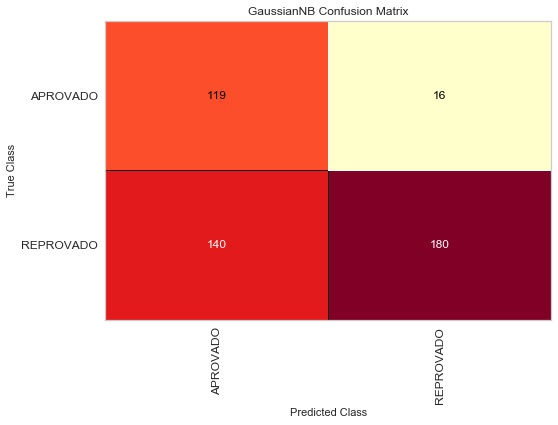

In [23]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()